In [257]:
# https://www.kaggle.com/c/learn-ai-bbc/overview

In [258]:
import io
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [259]:
train_df = pd.read_csv("./datasets/BBC News Train.csv")
test_df = pd.read_csv("./datasets/BBC News Test.csv")
sol_df = pd.read_csv("./datasets/BBC News Sample Solution.csv")
test_df = pd.merge(test_df, sol_df, on="ArticleId")

In [260]:
train_x = train_df.Text.values
test_x = test_df.Text.values
train_y = train_df.Category.values
test_y = test_df.Category.values

In [261]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

train_x = [remove_stopwords(i) for i in train_x]

In [262]:
NUM_WORDS = 1000
EMBEDDING_DIM = 64
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [263]:
tokenizer = Tokenizer(
	num_words = NUM_WORDS,
	oov_token = OOV_TOKEN,
)
tokenizer.fit_on_texts(train_x)


train_x = tokenizer.texts_to_sequences(train_x)
test_x = tokenizer.texts_to_sequences(test_x)

maxlen = max([len(i) for i in train_x])

train_x = pad_sequences(train_x, maxlen=MAXLEN, padding=PADDING)
test_x = pad_sequences(test_x, maxlen=MAXLEN, padding=PADDING)

In [264]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

In [266]:
(24963, 16, 1881)
NUM_WORDS, EMBEDDING_DIM, MAXLEN

(1000, 64, 120)

In [281]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAXLEN),
    # tf.keras.layers.GlobalAveragePooling1D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(24, activation='relu'),
	# tf.keras.layers.Dense(80, activation='relu'),
	# tf.keras.layers.Dense(200, activation='relu'),
	# tf.keras.layers.Dense(10, activation='relu'),
	tf.keras.layers.Dense(len(np.unique(train_y)), activation='sigmoid'),
])
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['acc']
)
history = model.fit(
	train_x,
	train_y,
	epochs=10,
	validation_data=(test_x, test_y),
	# validation_split = 0.8,
)

Epoch 1/10
47/47 [==============================] - 1s 9ms/step - loss: 1.5838 - acc: 0.2497 - val_loss: 1.6275 - val_acc: 0.1864
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 1.2736 - acc: 0.6329 - val_loss: 1.6889 - val_acc: 0.1986
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4876 - acc: 0.9396 - val_loss: 2.1754 - val_acc: 0.1864
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.1041 - acc: 0.9960 - val_loss: 2.7037 - val_acc: 0.1918
Epoch 5/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0371 - acc: 1.0000 - val_loss: 2.9141 - val_acc: 0.2027
Epoch 6/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0182 - acc: 1.0000 - val_loss: 3.1384 - val_acc: 0.2027
Epoch 7/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0111 - acc: 1.0000 - val_loss: 3.2836 - val_acc: 0.1891
Epoch 8/10
47/47 [==============================] - 0s 5ms/step - loss: 0.0076 - acc: 1.00

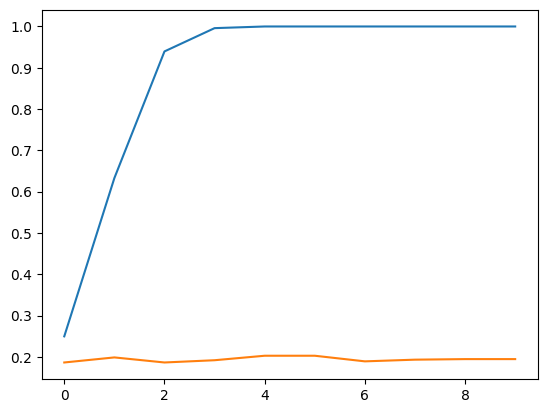

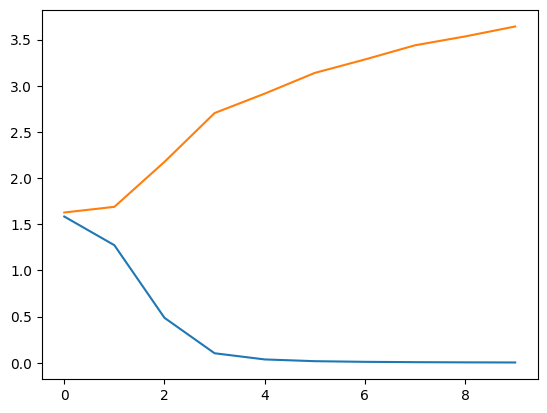

In [282]:
history = history.history
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.show()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.show()

In [283]:
model.evaluate(test_x, test_y)

23/23 [==============================] - 0s 1ms/step - loss: 3.6410 - acc: 0.1946


[3.6410067081451416, 0.1945578157901764]

In [284]:
i = np.random.randint(0, len(test_y))

orig = le.classes_[test_y[i]]
pred = le.classes_[np.argmax(model.predict(test_x[i:i+1]))]

print(orig == pred, orig, pred)
print(test_df.Text[i])

1/1 [==============================] - 0s 72ms/step
False business politics
chancellor rallies labour voters gordon brown has issued a rallying cry  telling supporters the  stakes are too high  to stay at home or protest vote in the forthcoming general election.  the chancellor said the vote - expected to fall on 5 may - will give a  clear and fundamental  choice between labour investment and conservative cuts. speaking at labour s spring conference in gateshead  mr brown claimed the nhs was not safe in conservative hands. he said tory plans to cut £35bn tax would  cut deep into public service .  to a packed audience at gateshead s sage centre  the chancellor said the cuts proposed by shadow chancellor oliver letwin were the equivalent of sacking every teacher  gp and nurse in the country  he told activists. laying into the conservative s record in government he said:  i give you this promise - with labour  britain will never return to the mistakes of erm and 10% inflation  15% interes